# wine magazine data analysis using seaborn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path = "winemag_data_first150k.csv"
wine_data = pd.read_csv(data_path, index_col=0)
wine_data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


# 1. Count plot

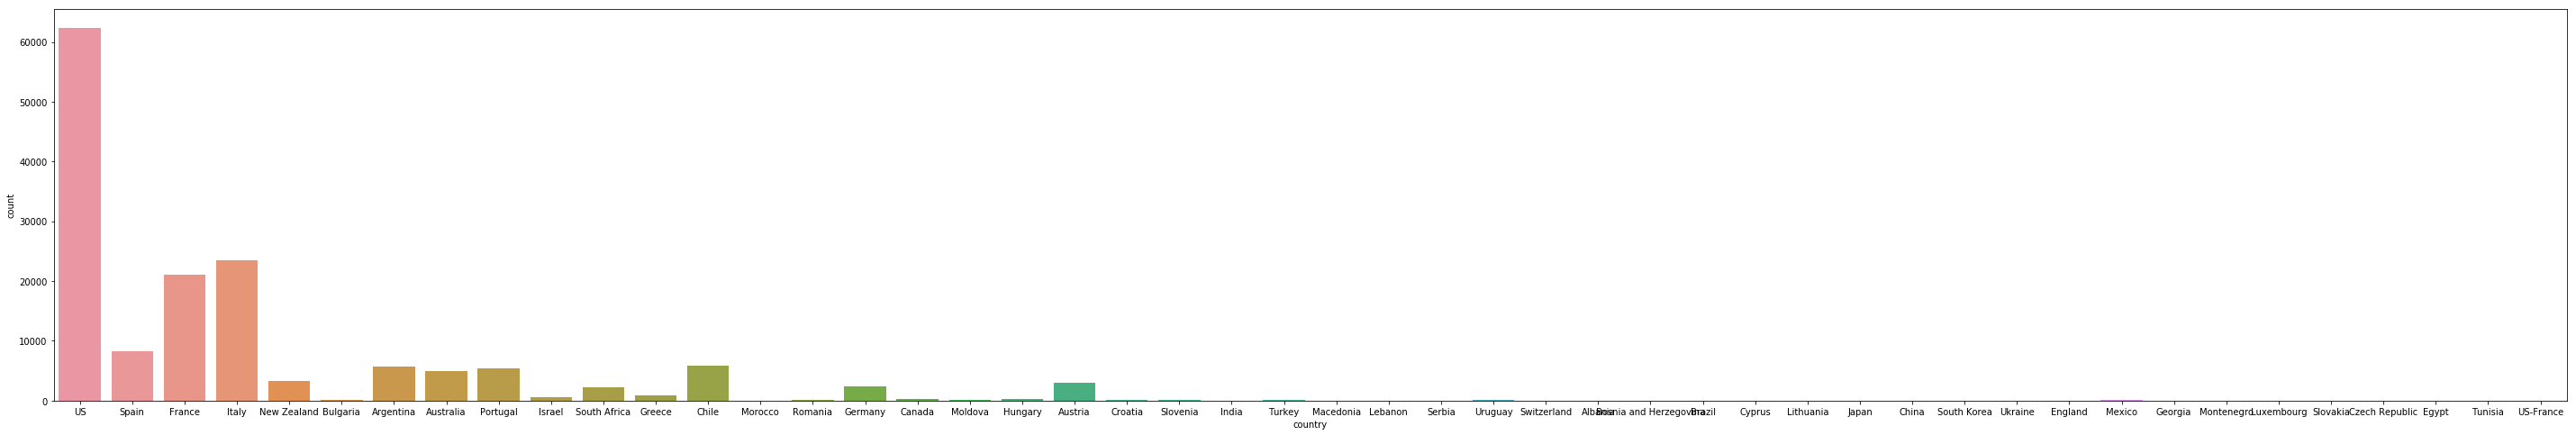

In [3]:
plt.figure(figsize=(50,8))
sns.countplot(wine_data["country"])

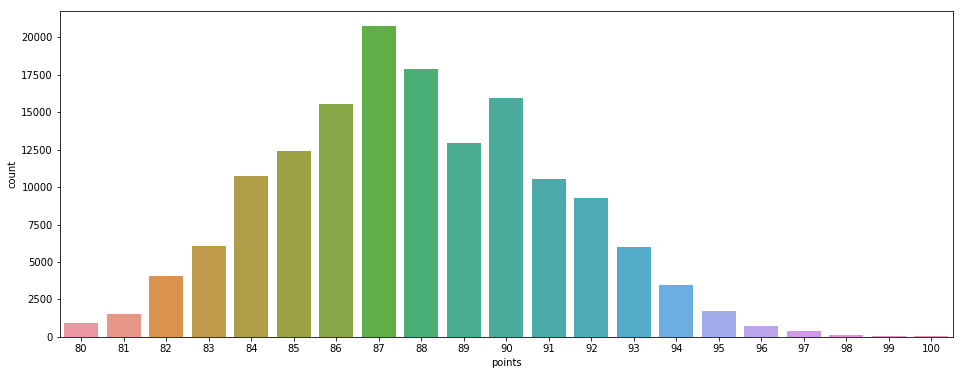

In [4]:
plt.figure(figsize=(16,6))
sns.countplot(wine_data["points"])

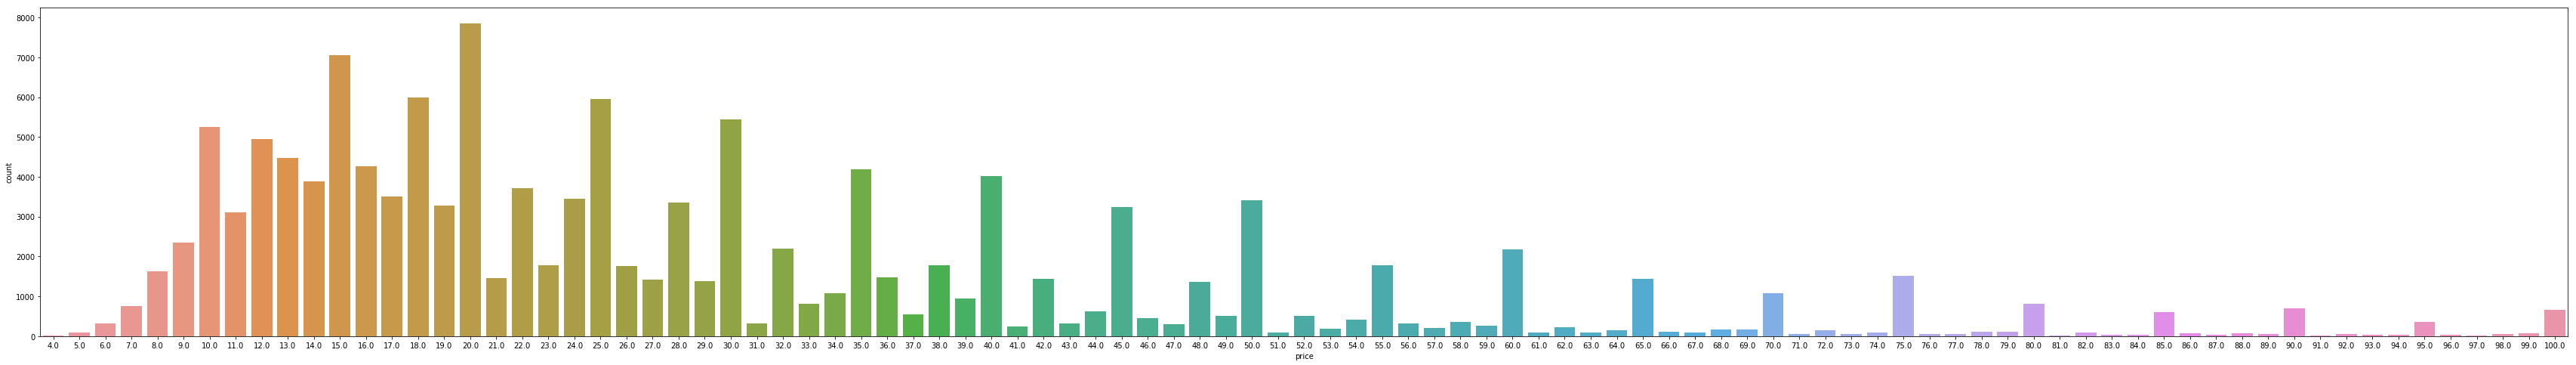

In [5]:
plt.figure(figsize=(60,8))
sns.countplot(wine_data[wine_data["price"]<=100]["price"])

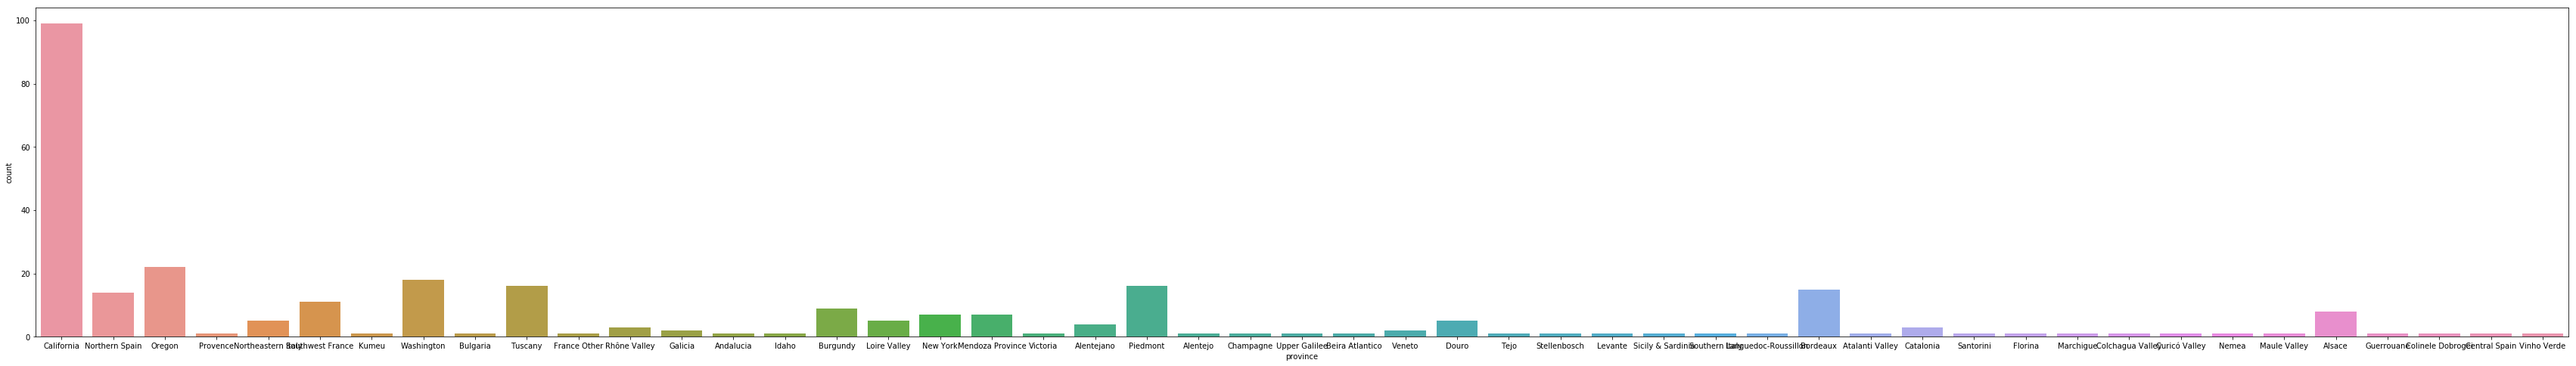

In [6]:
plt.figure(figsize=(60,8))
sns.countplot(wine_data["province"].head(300))

# 2. kde plot

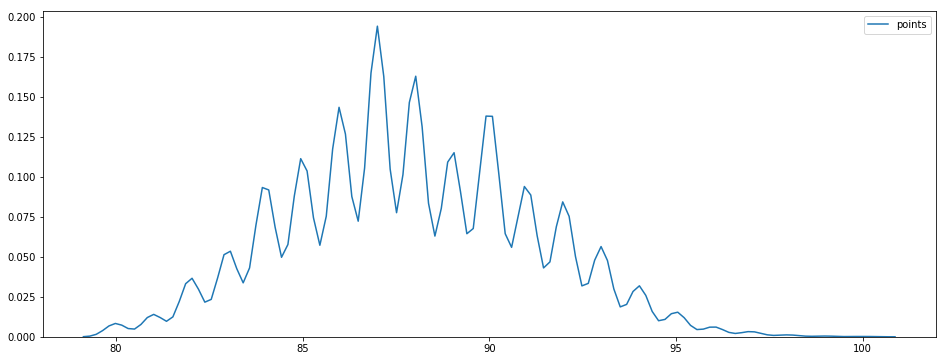

In [7]:
plt.figure(figsize=(16,6))
sns.kdeplot(wine_data["points"])

C:\Users\ShAhiN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ShAhiN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


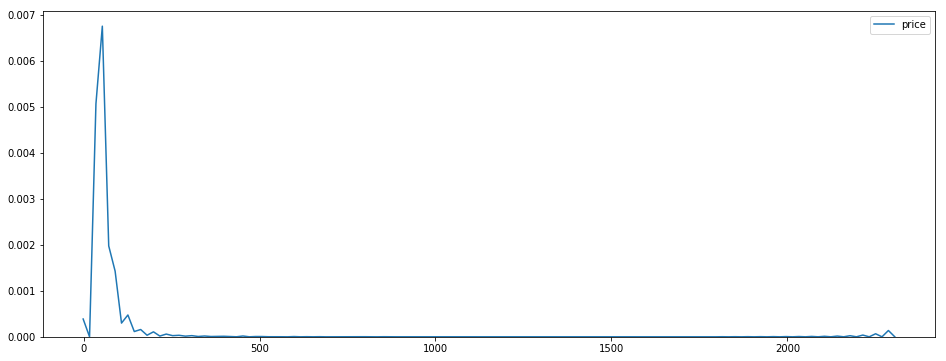

In [8]:
plt.figure(figsize=(16,6))
sns.kdeplot(wine_data["price"])

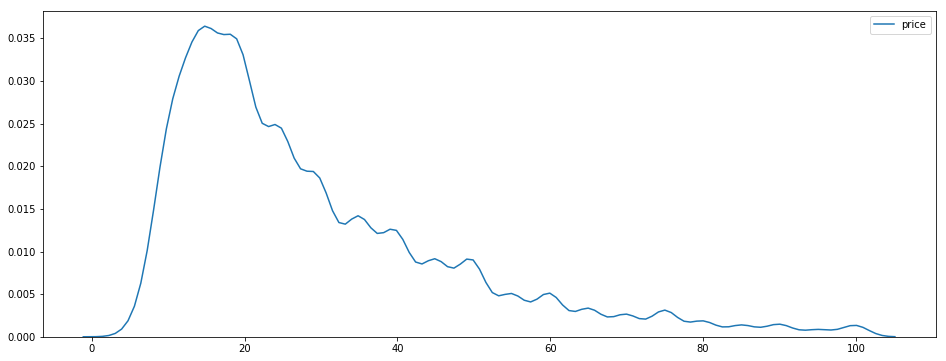

In [9]:
plt.figure(figsize=(16,6))
sns.kdeplot(wine_data[wine_data["price"]<=100]["price"])

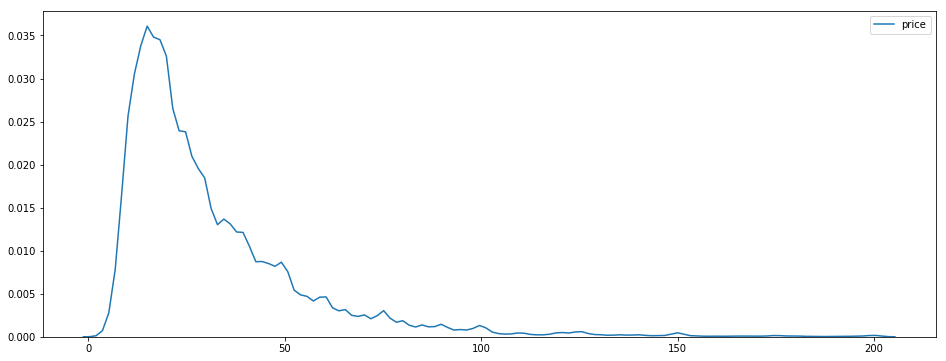

In [10]:
plt.figure(figsize=(16,6))
sns.kdeplot(wine_data.query("price <= 200").price)

# 3. KDE 2D plot

C:\Users\ShAhiN\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


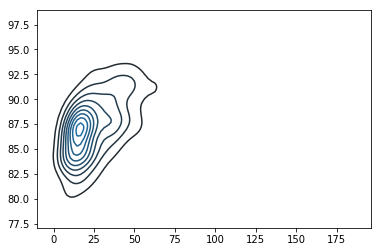

In [11]:
sns.kdeplot(wine_data[wine_data['price']< 200].loc[:,['price', 'points']].dropna().sample(500))

# 4. Histogram 

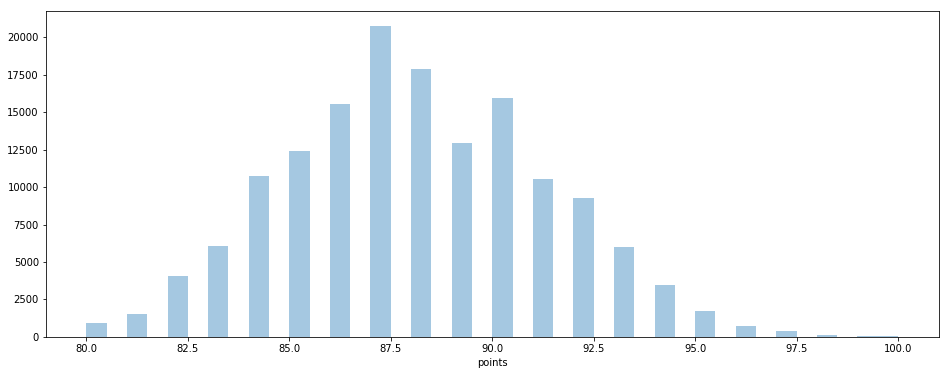

In [12]:
plt.figure(figsize=(16,6))
sns.distplot(wine_data["points"], bins=40, kde=False)

In [13]:
ss2 = wine_data[['points', 'price']]
ss2.head()

,points,price
0,96,235.0
1,96,110.0
2,96,90.0
3,96,65.0
4,95,66.0


# 5. scatter / joint plot

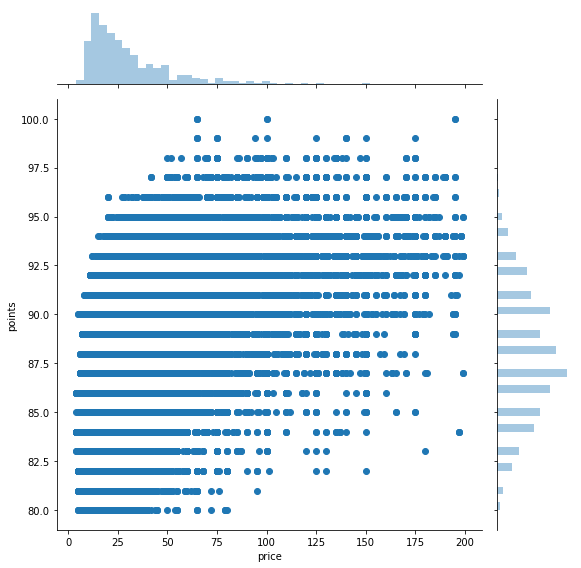

In [14]:
sns.jointplot(x="price", y="points", data=wine_data[wine_data["price"]<200], height=8)

# 6. kde joint plot

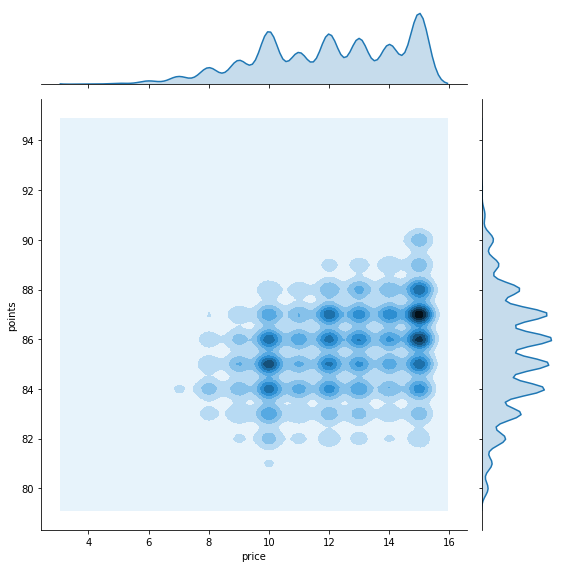

In [15]:
sns.jointplot(x="price", y="points", data=wine_data[wine_data["price"]<=15], kind="kde", height=8)

# 7. hex joint plot

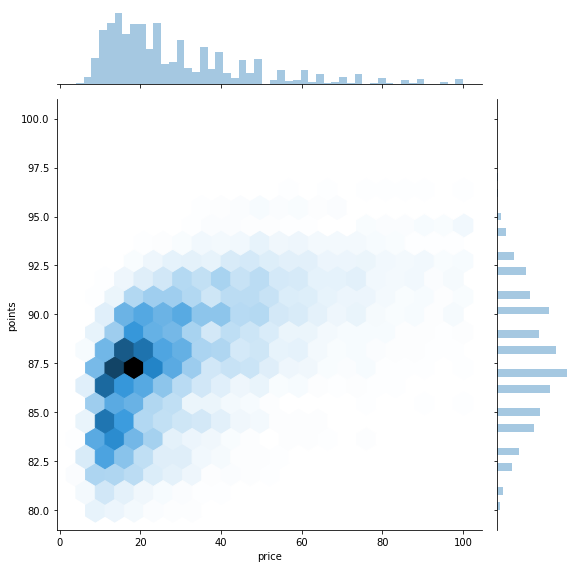

In [16]:
sns.jointplot(x="price", y="points", data=wine_data[wine_data["price"]<=100], kind="hex", gridsize=20, height=8)

# 8. Box plot

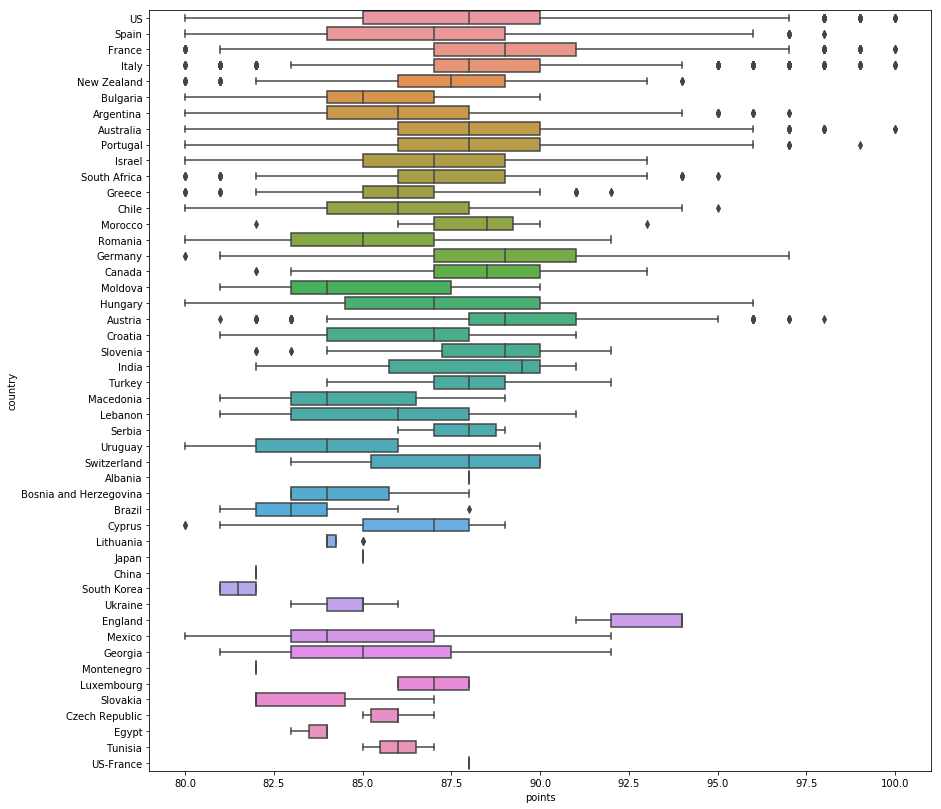

In [17]:
plt.figure(figsize=(14,14))
sns.boxplot(x=wine_data["points"], y=wine_data["country"], data=wine_data)

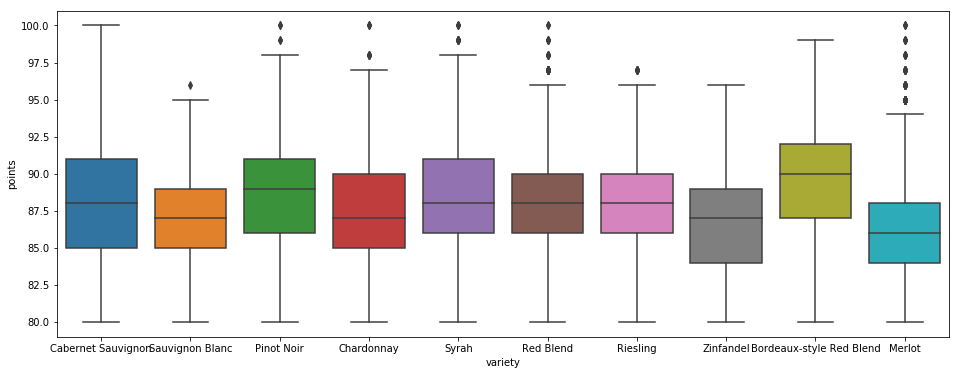

In [18]:
plt.figure(figsize=(16,6))
dt = wine_data[wine_data.variety.isin(wine_data.variety.value_counts().head(10).index)]
sns.boxplot(x="variety", y="points", data=dt)

# 9. Boxen plot

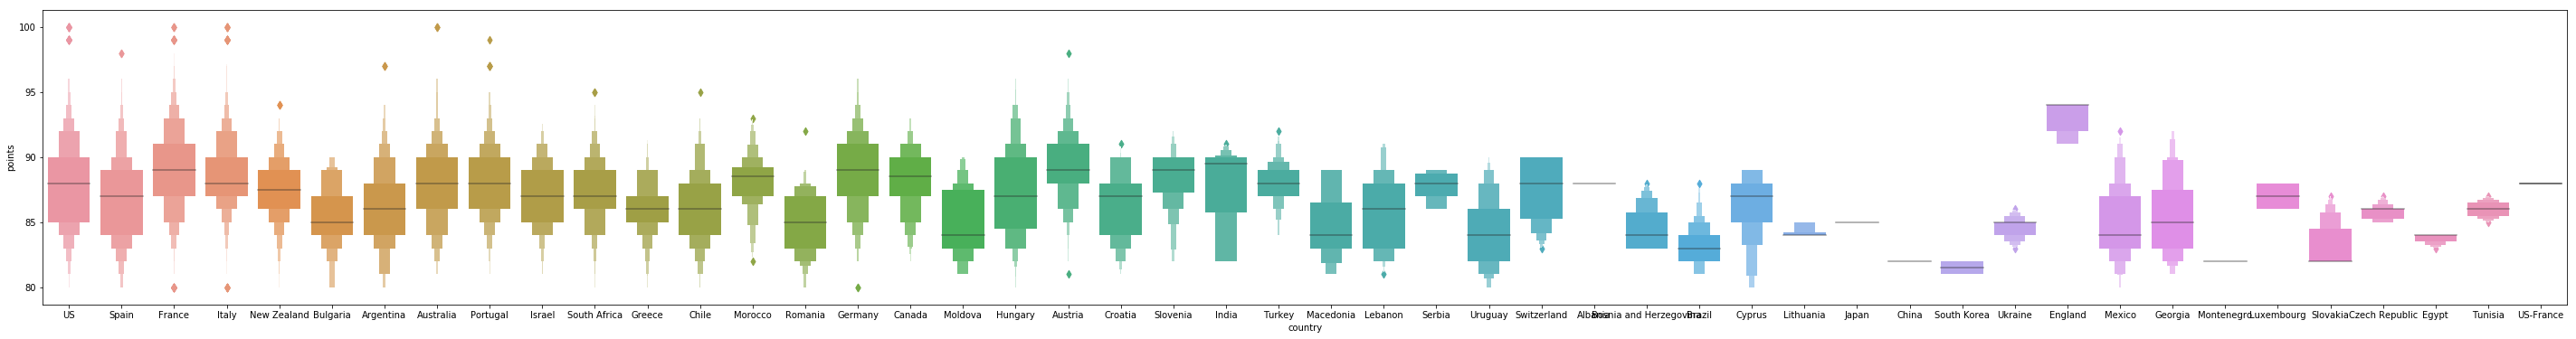

In [19]:
plt.figure(figsize=(50,6))
sns.boxenplot(x=wine_data["country"], y=wine_data["points"], data=wine_data)

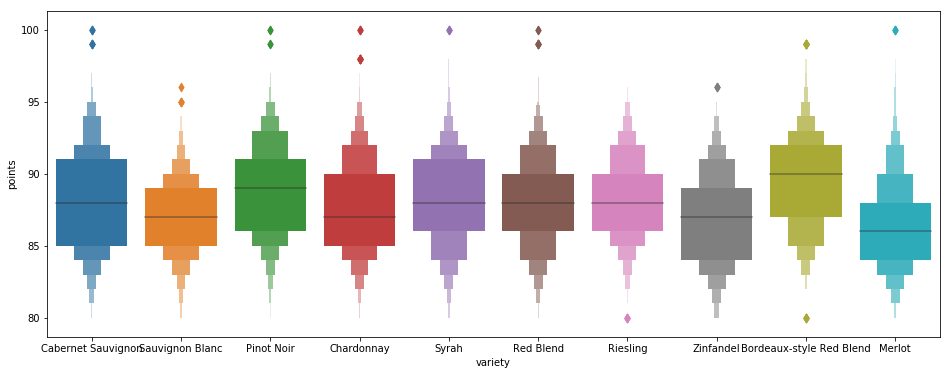

In [20]:
plt.figure(figsize=(16,6))
dt = wine_data[wine_data.variety.isin(wine_data.variety.value_counts().head(10).index)]
sns.boxenplot(x="variety", y="points", data=dt)

# 10. violin plot

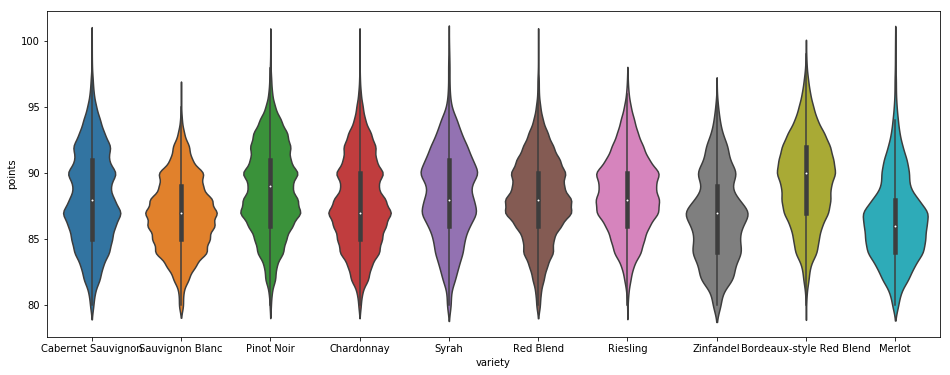

In [21]:
plt.figure(figsize=(16,6))
dt = wine_data[wine_data.variety.isin(wine_data.variety.value_counts().head(10).index)]
sns.violinplot(x="variety", y="points", data=dt)